# Wine Quality Predictor Report

## Summary

## Introduction

## Methods

In [2]:
#imports 
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np
import seaborn as sns

### Data

In [3]:
url_red = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
url_white = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

red_wine_data = pd.read_csv(url_red, sep=';')
red_wine_data.head()

white_wine_data = pd.read_csv(url_white, sep=';')
white_wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [ ]:
### EDA

In [ ]:
#Columns, all feautures are numeric. Target is integer
#n=1599
red_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
#There are not missing values in any features
red_wine_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
#Summary statistics of the features
red_wine_data.drop(columns=["quality"]).describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>, <Axes: >]], dtype=object)

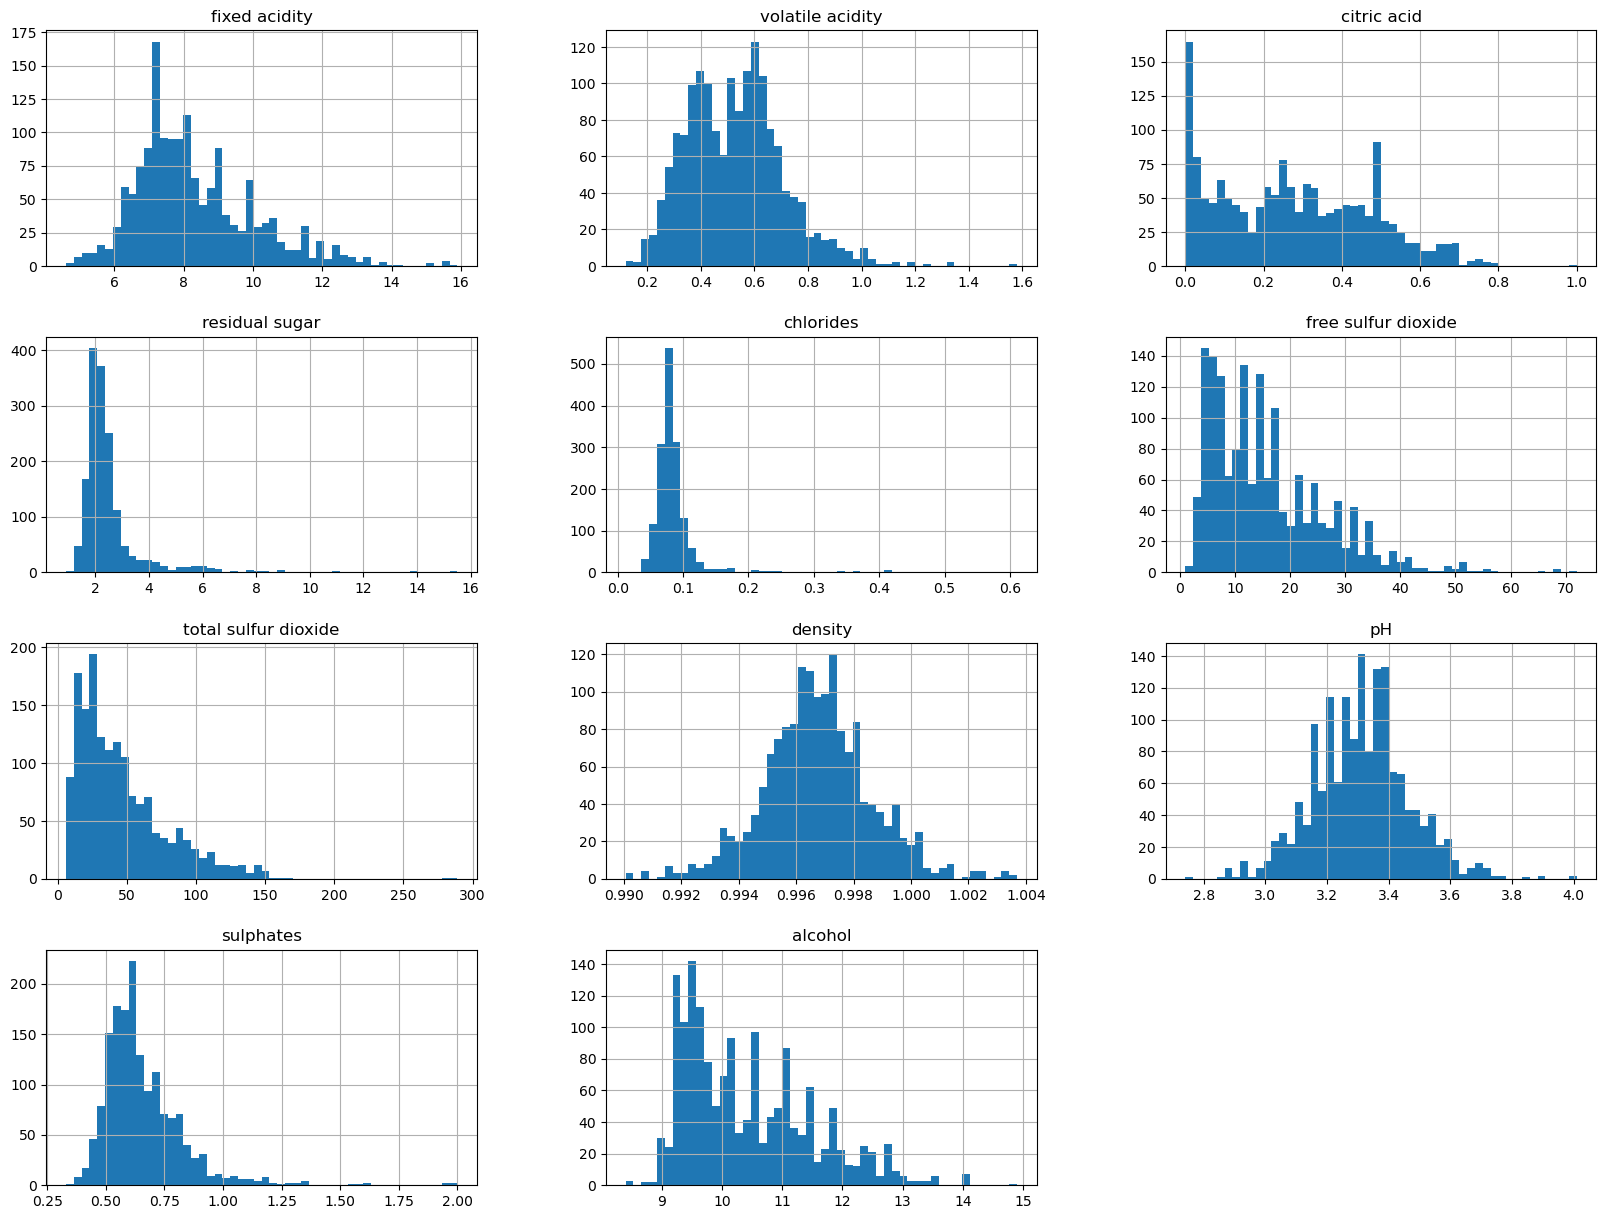

In [8]:
#Some variables are right skewed: residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide and sulphates.
#Some features have narrow ranges: density (0.990-1.004), pH(2.9-3.7), fixed acidity (95% around 6-9). So, it is necessary the scaling. The outliers stand out relative to small ranges.
#Density could be correlated with sugar/alcohol (overlapping).
#High alcohol content wines are few but is expected to be one of the best predictors for quality. 
#Outliers are: residual sugar(>10), chloried (>0.4), total suffur dioxide (>200), free suffur dioxide (>70)
#Target left out of the analysis in order to prevent leakage

red_wine_data.drop("quality", axis=1).hist(bins=50, figsize=(20, 15))

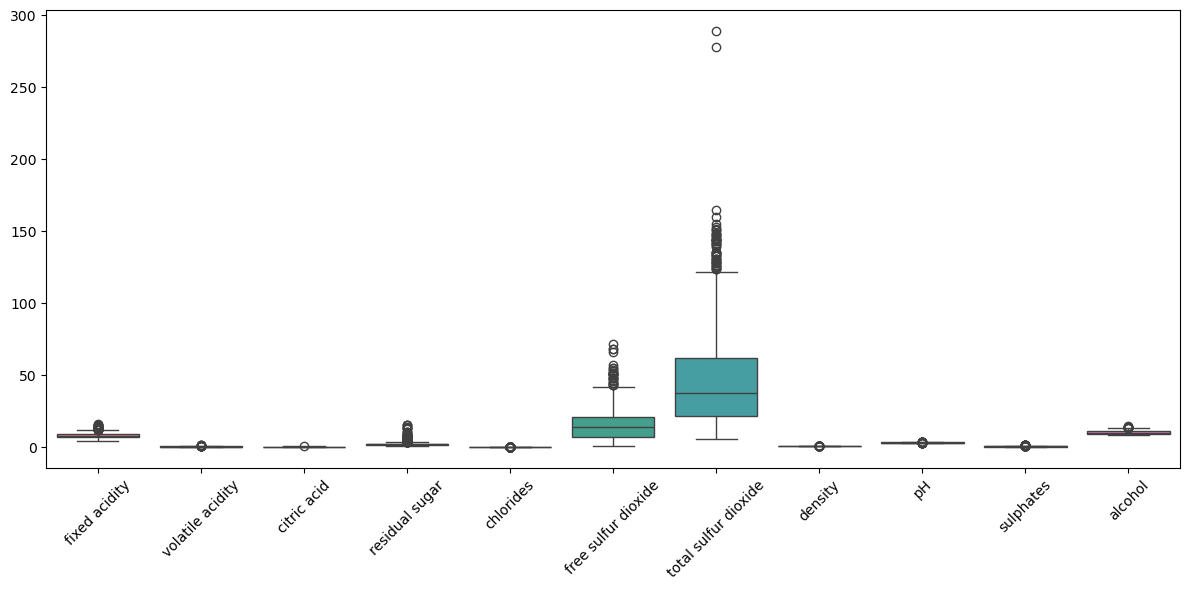

In [9]:
#The scales matter: free suffur dioxide and total suffur dioxide have magnitude orders larger than the rest of features.
#Several features have heavy tails and outliers: residual sugar, free sulfur dioxide, total sulfur dioxide and alcohol.
#Some boxplots are tight: fixed acidity, volatile acidity, citric acidity, chlorides, ph so it is possible they have weak predictive power.
#Alcohol has a larger spread so can have a better prediction value. 

plt.figure(figsize=(12,6))
sns.boxplot(data=red_wine_data.drop(columns=["quality"]))

plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


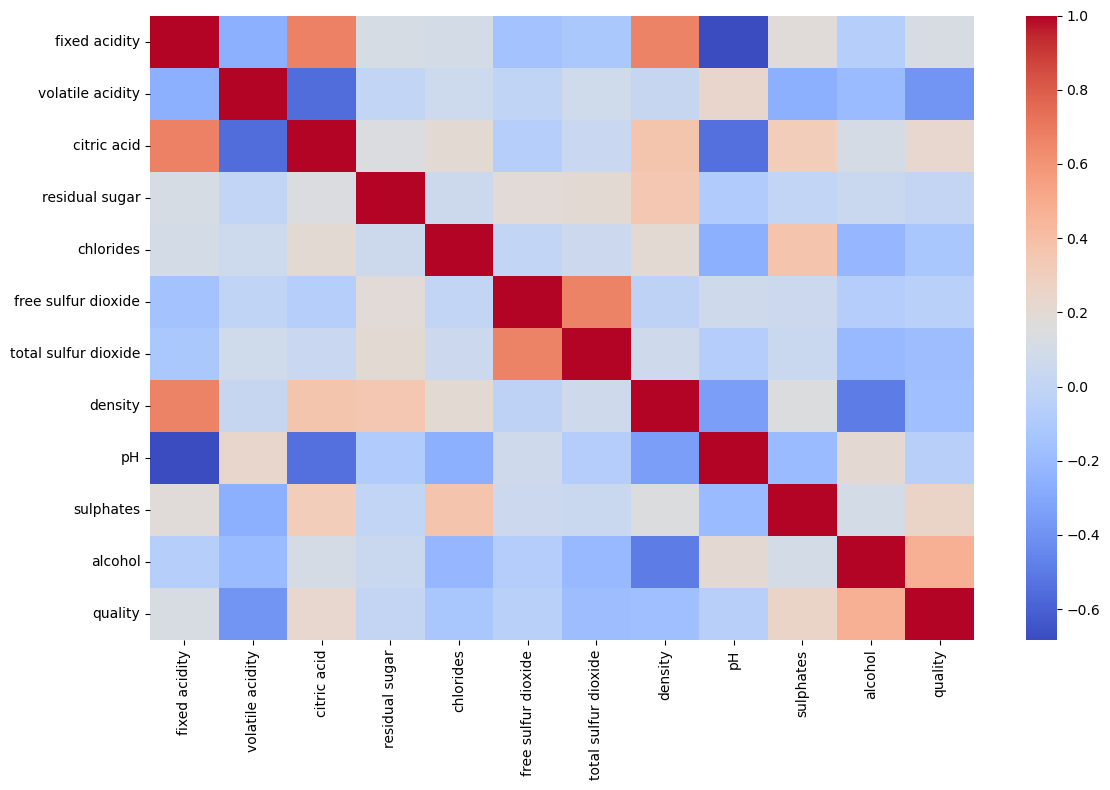

In [ ]:
#There are strong positive relationships: total sulfur dioxide with free sulfur dioxide and fixed acidity with citric acid an also density (acid wines have more acid and are more dense). 
#Also are negative relationships: density and alcohol (more alcohol reduces the density)
#There is a strong positive relationship between alcohol and quality and a negative one between volatile acidity and quality.


plt.figure(figsize=(12,8))

sns.heatmap(
    red_wine_data.corr(),
    annot=False,
    cmap="coolwarm"
)

plt.tight_layout()
plt.show()

### Analysis

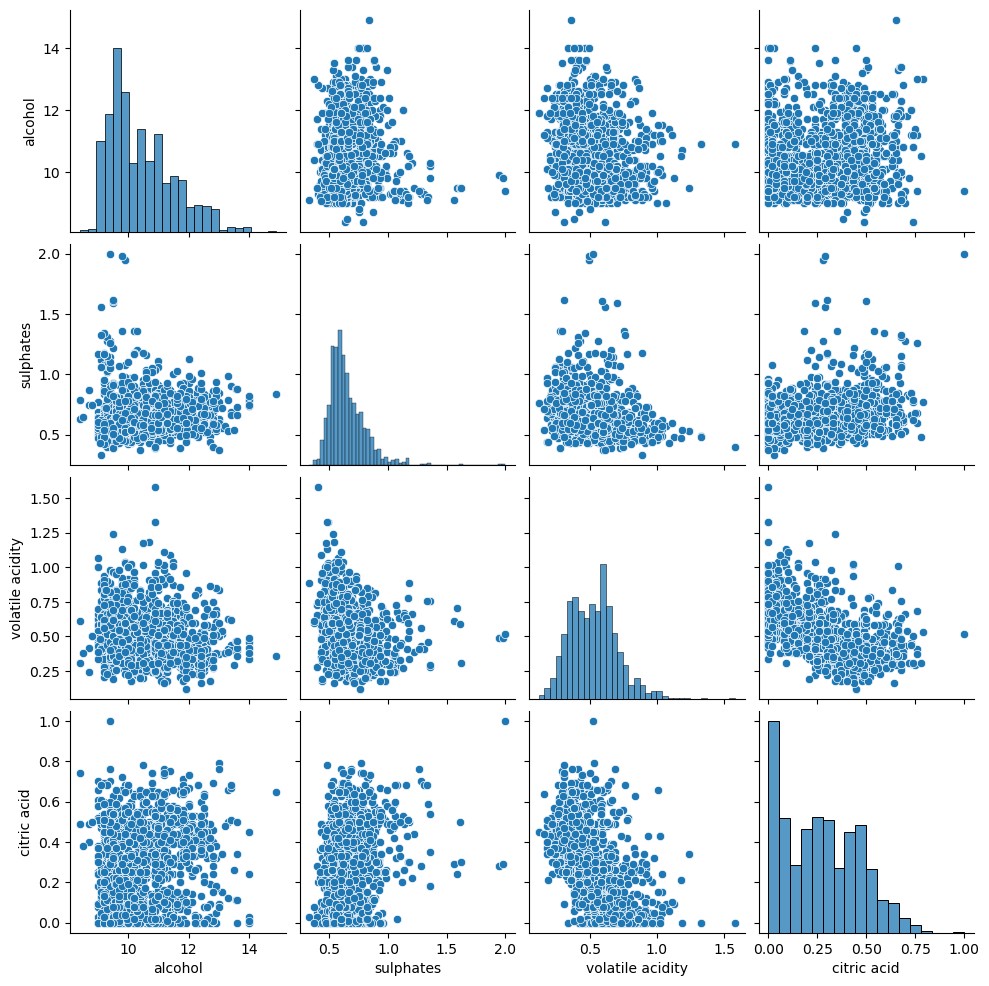

In [ ]:
#Chemical features have weak pairwise relationship, with no clear patterns suggesting low multicolinearity. 
#As the variables don´t look so similar and not redundant, it seems that every individual feature have different predictive value or information.
relevant_features = ["alcohol", "sulphates", "volatile acidity", "citric acid"]
sns.pairplot(red_wine_data[relevant_features])



## Results & Discussion

## References